### HEALTH INSURANCE PREDICTION
##### The aim of this project is to predict the cost of charges for each individuals based on their independent variables given in ourdatasets below.So let's get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


#### DATA PREPROCESSING:

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Converting categorical data columns to numerical data columns i.e sex,smoker,region

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [11]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [13]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [16]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


#### Store Feature Matrix (independent variables) in X and Response or Target Variable in vector y

In [17]:
X=df.drop(['charges'],axis=1)
y=df['charges']

##### Let us Train_Test_Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### MODELING:
##### Import The Models:since it is a regression problem,we will import the regression models known

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

##### Train The Models: by creating instances with variables

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

##### We Have To Predict On Test Data

In [22]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)

In [23]:
final_pred=pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'Svm':y_pred2,'Rf':y_pred3,'Gbr':y_pred4})
final_pred

,Actual,Lr,Svm,Rf,Gbr
764,9095.06825,8924.407244,9548.261584,11652.015856,11001.128629
887,5272.17580,7116.295018,9492.515425,5058.283940,5840.174656
890,29330.98315,36909.013521,9648.758701,28298.018065,28001.980112
1293,9301.89355,9507.874691,9555.044136,9981.076504,9745.291602
259,33750.29180,27013.350008,9420.421978,34401.891142,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47367.197213,45431.423211
575,12222.89830,11814.555568,9625.431547,12267.718700,12465.025294
535,6067.12675,7638.107736,9504.168517,6397.704901,6974.336525
543,63770.42801,40959.081722,9605.004594,46909.497725,47862.047791


##### Now,We will Have To Compare Performances Visually Using Subplot from Matplotlib

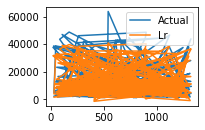

In [24]:
plt.subplot(221)
plt.plot(final_pred['Actual'],label='Actual')
plt.plot(final_pred['Lr'],label='Lr')
plt.legend()

##### As we can see,we cannot differentiate actual values from predicted (Lr),we will have to compare first 10 values using iloc to select only 10 rows

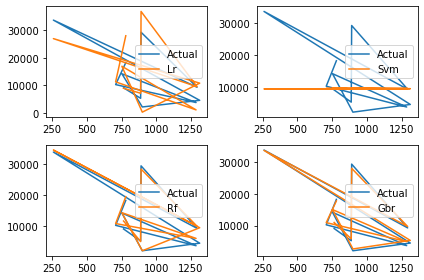

In [25]:
plt.subplot(221)
plt.plot(final_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(final_pred['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(final_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(final_pred['Svm'].iloc[0:11],label='Svm')
plt.legend()

plt.subplot(223)
plt.plot(final_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(final_pred['Rf'].iloc[0:11],label='Rf')
plt.legend()

plt.subplot(224)
plt.plot(final_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(final_pred['Gbr'].iloc[0:11],label='Gbr')
plt.legend()
plt.tight_layout()

#### EVALUATING MODELS:
##### The Next Step Is To Evaluate The Algorithms.The greater the value of R_square the bettter the regression Model

In [26]:
from sklearn import metrics

In [27]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [28]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8657145713317087 0.8779936181637191


##### We can see that model4 is performing better than any other model. Let us use mean_absolute_error

In [29]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [30]:
print(s1,s2,s3,s4)

4186.508898366437 8592.428727899724 2471.612569677923 2447.167158715136


##### As We can see,model 4(Gradient boosting regressor) is the most effective prediction model for this problem

##### Now,let us predict charges for new customer using gradient boosting regressor

In [31]:
A=X.head(1)
A

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [32]:
New_pred=gbr.predict(A)
print(New_pred)


[17792.46608893]


##### This way we can perform prediction for unseen samples and new customers

#### SAVE MODEL USING JOBLIB:
##### Since gbr is our best prediction model for this,we will have to train gbr on entire dataset before deployment

In [33]:
gbr=GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [34]:
import joblib

In [35]:
joblib.dump(gbr,'model_joblib_gbr')

['model_joblib_gbr']

In [36]:
model=joblib.load('model_joblib_gbr')

#### GUI:

In [50]:
from tkinter import*
import joblib

In [54]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model = joblib.load('model_joblib_gbr')
    result= model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text='Your Health Insurance Cost is:').grid(row=7)
    Label(master,text=result).grid(row=8)
master =Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg='black',
               fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter your Age").grid(row=1)
Label(master,text="Male or Female[1/0]").grid(row=2)
Label(master,text="Enter your BMI Value").grid(row=3)
Label(master,text="Enter your Number of Children").grid(row=4)
Label(master,text="Smoker Yes/No[1/0]").grid(row=5)
Label(master,text="Region[1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()